# Classificazione Binaria: `selfMade` con naive bayes

Viene utilizzato un classificatore Naive Bayes Gaussiano

In [1]:
import numpy as np
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import os
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model,plot_roc_curve

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()


X_train = X_train.drop(columns=['source'], errors='ignore')  
X_train = X_train.loc[:, X_train.nunique() > 1]  

# Allineamento test set
X_test = X_test[X_train.columns]

# Riempio NaN residui con la mediana
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [2]:
from sklearn.naive_bayes import GaussianNB


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, "../models/scaler_naivebayes.joblib")


# Modello Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predizioni
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [3]:
evaluate_and_save_model(
    model,
    "naive bayes",
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    "../results/classification_selfMade/naive_bayes",
    "../models/naive_bayes_selfmade.joblib"
)

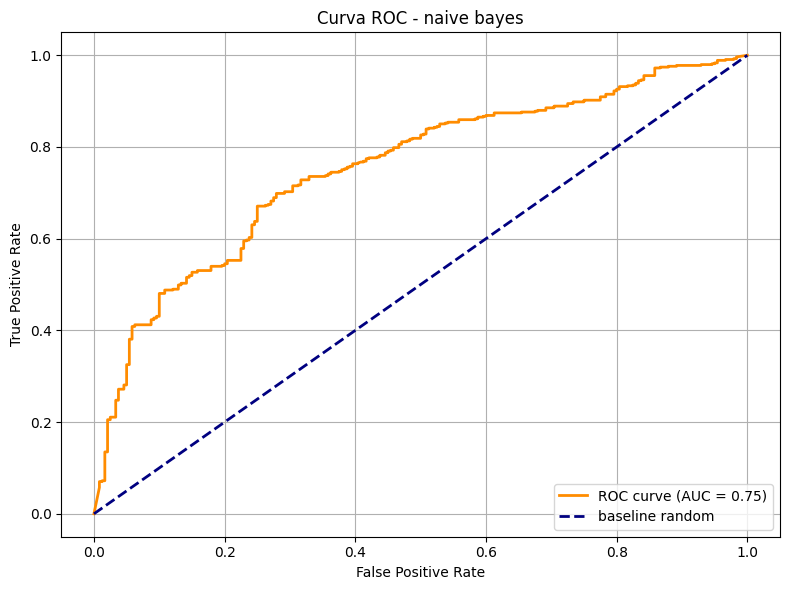

np.float64(0.7532386013555147)

In [4]:
plot_roc_curve(model, X_test_scaled, y_test, "naive bayes",f"../results/classification_selfMade/roc")
